In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('Wine_Quality_Data.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [2]:
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [3]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

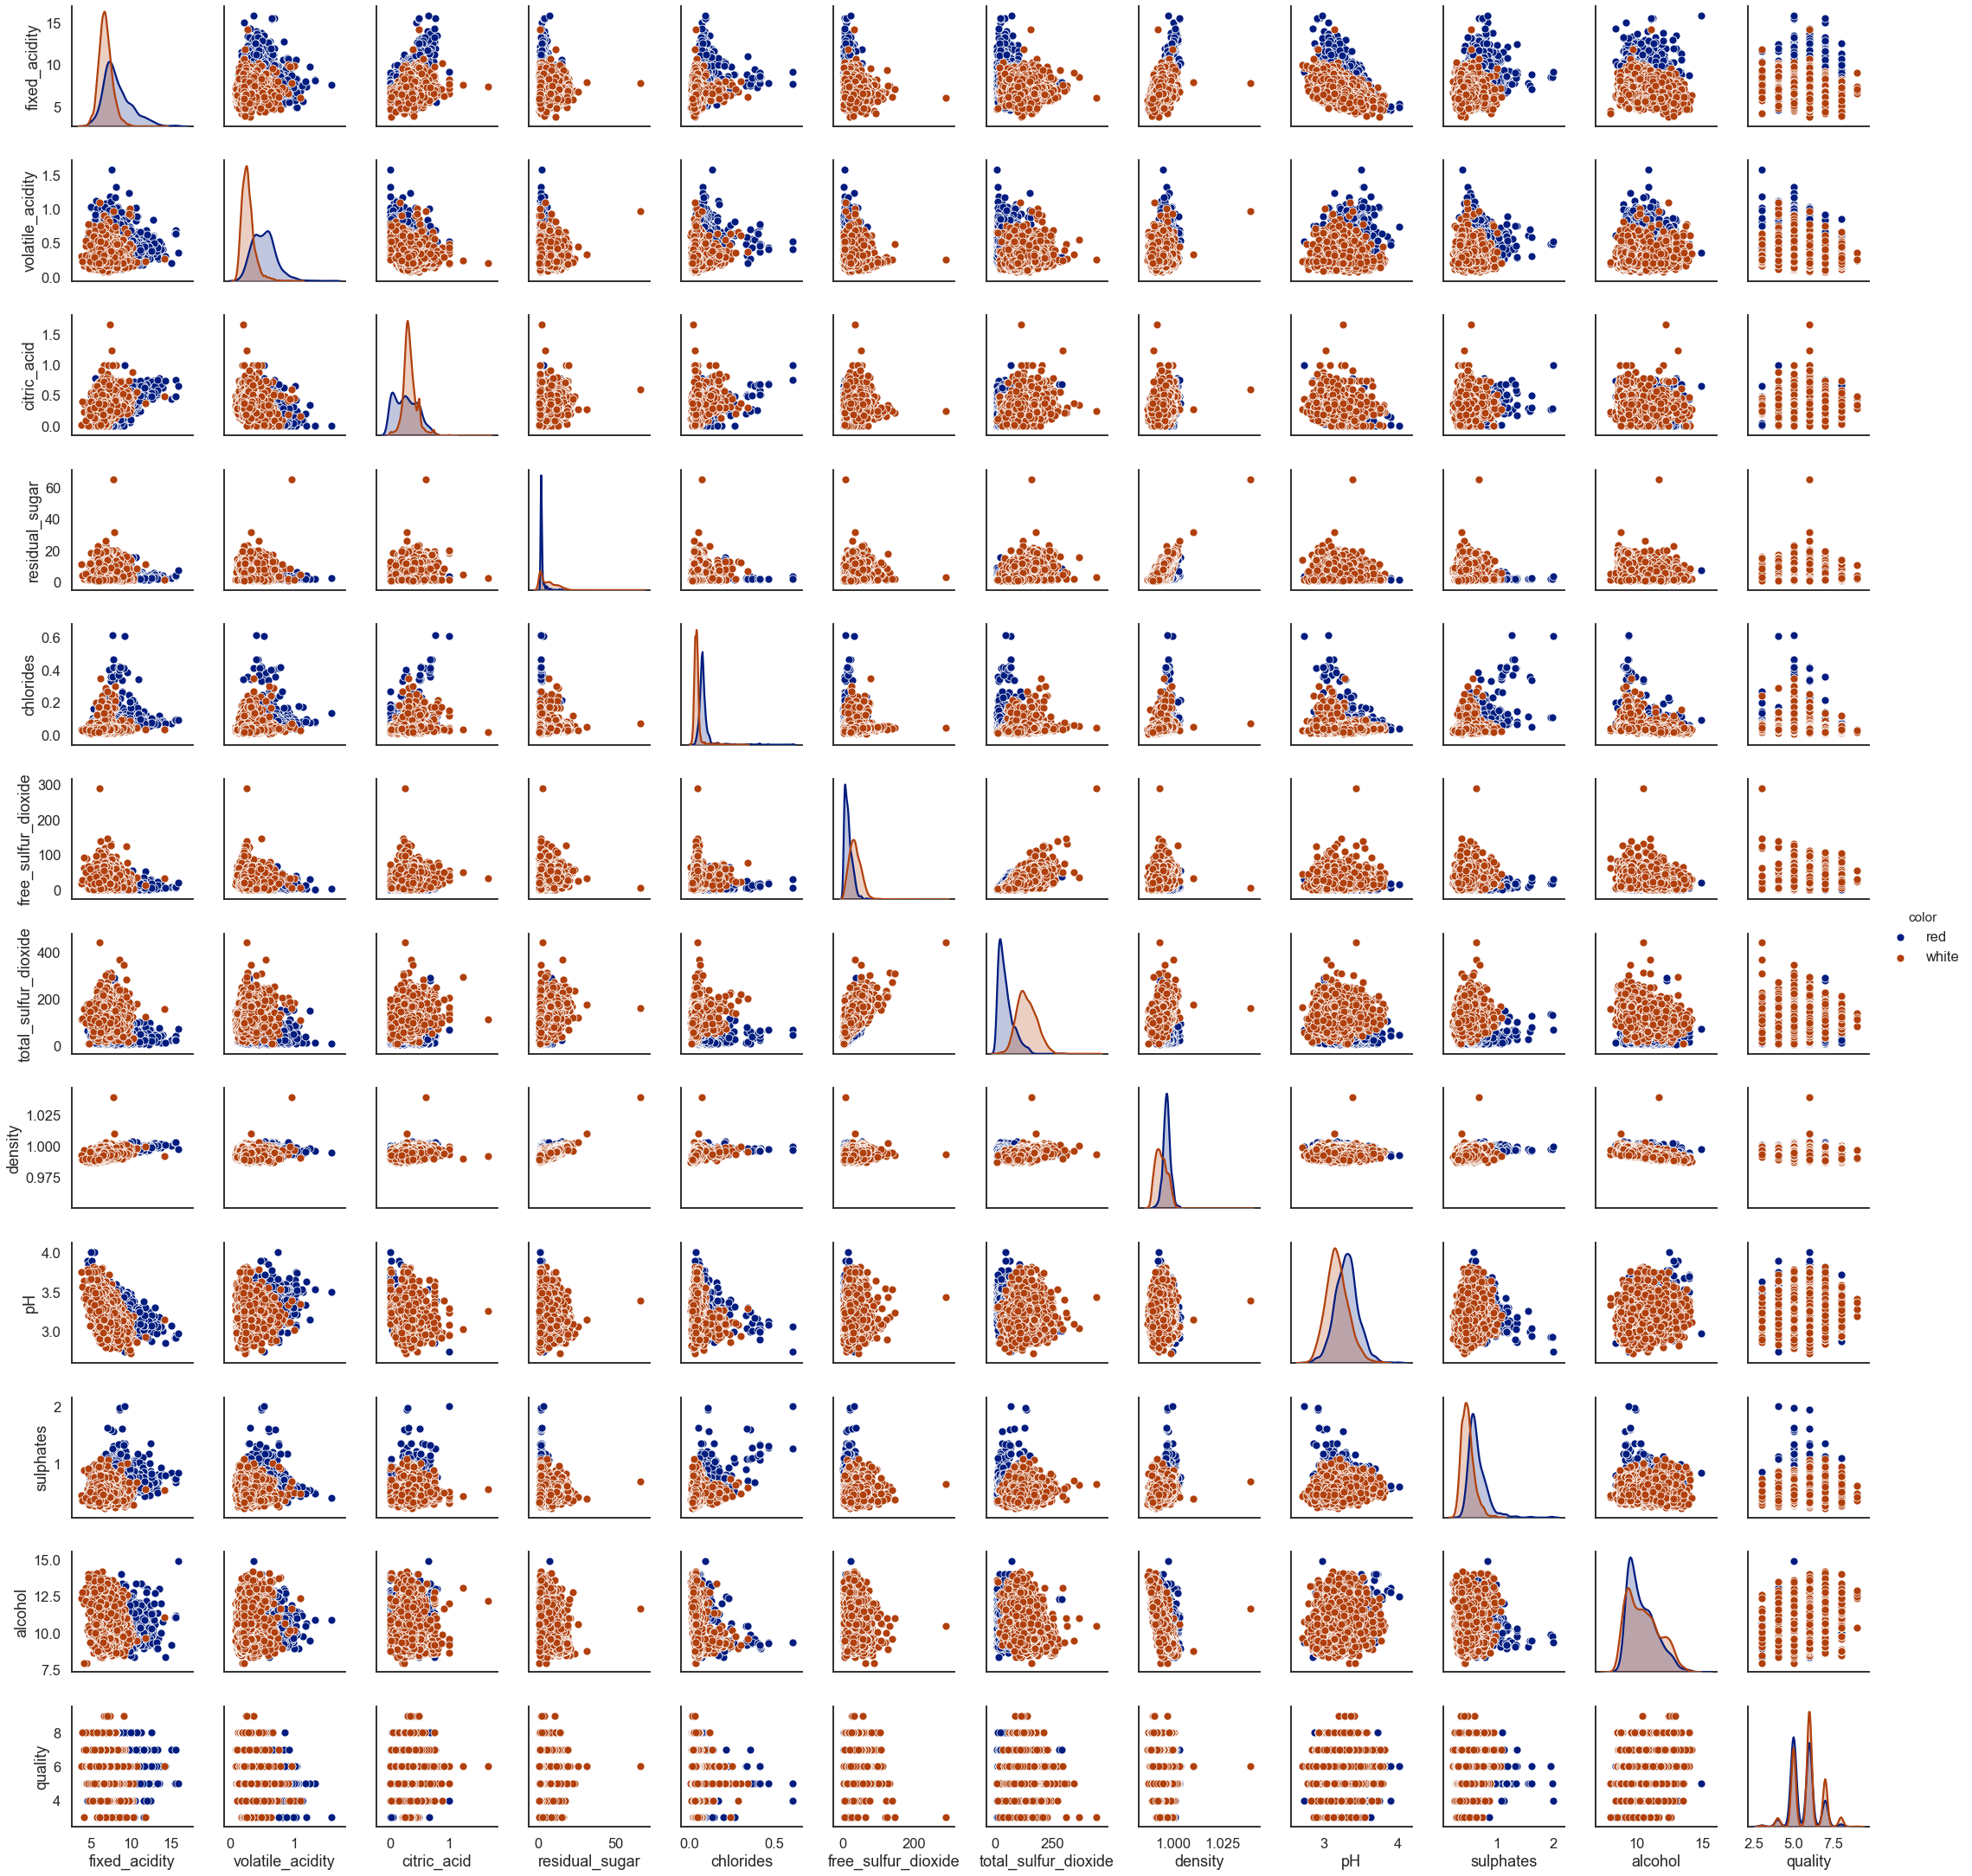

In [5]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data, hue='color')

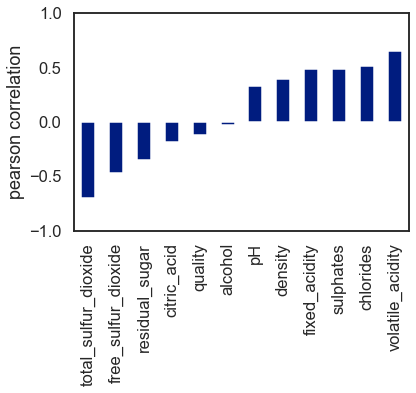

In [6]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [7]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Linear SVC

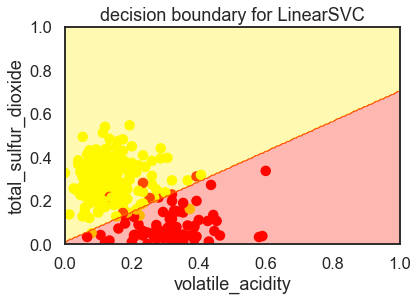

In [8]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)


x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)


ax.set(xlabel=fields[0], ylabel=fields[1],
              xlim=[0, 1], ylim=[0, 1],
              title='decision boundary for LinearSVC');

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y2_LSVC_model = LSVC.predict(X)
print("LSVC Accuracy :", accuracy_score(y, y2_LSVC_model))

LSVC Accuracy : 0.9545944281976296


## Gaussian kernel SVC

In [11]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    
    ax.set(xlabel=fields[0], ylabel=fields[1], title=str(estimator))

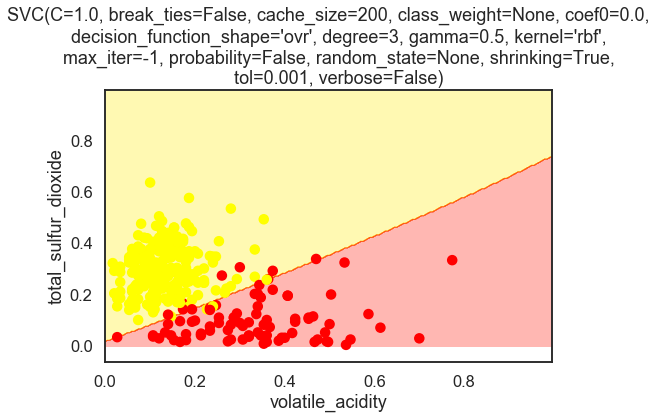

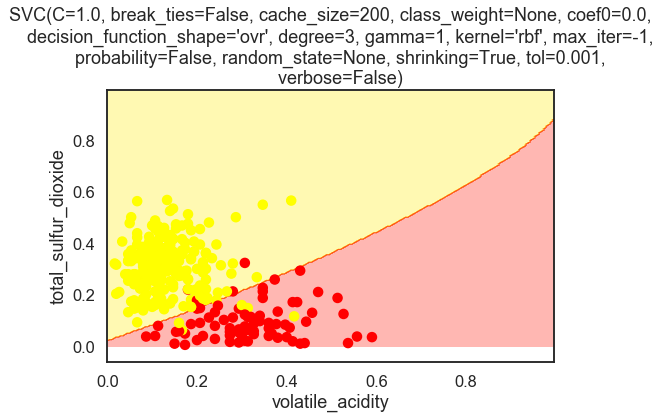

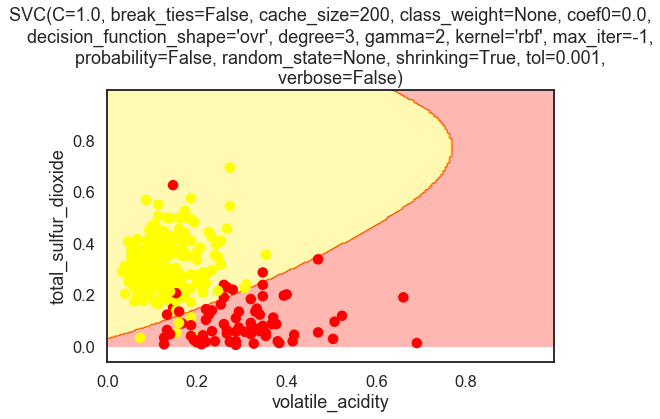

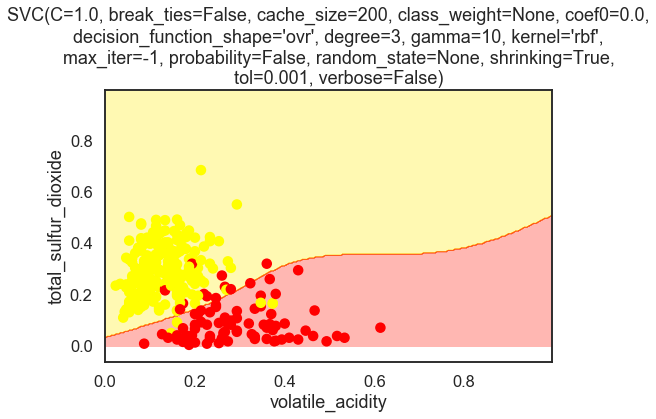

In [12]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

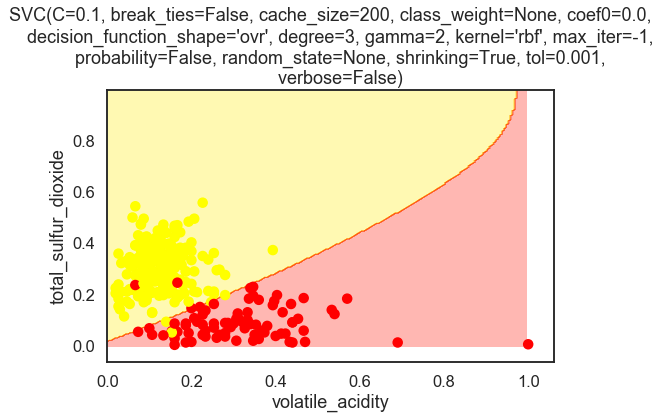

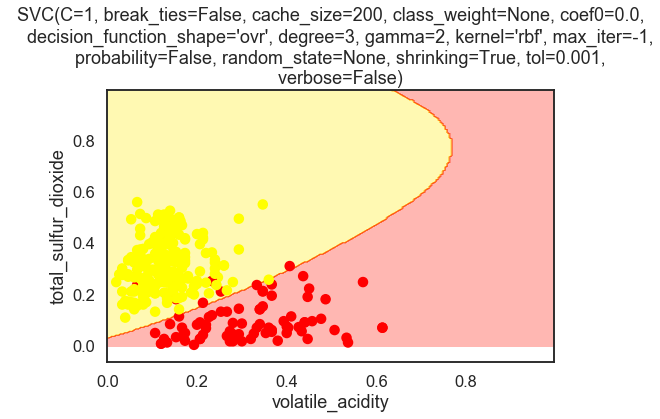

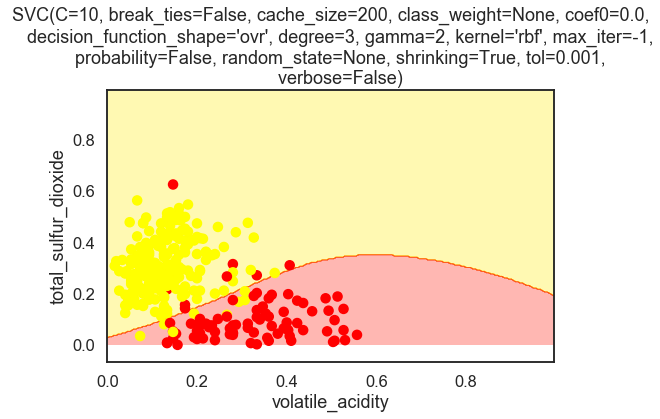

In [13]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [14]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)

In [15]:
from sklearn.model_selection import GridSearchCV 
   
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.959, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.955, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.958, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.946, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.948, total=   0.2s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.957, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.956, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.960, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.945, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.950, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [17]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1447
           1       0.92      0.90      0.91       503

    accuracy                           0.95      1950
   macro avg       0.94      0.94      0.94      1950
weighted avg       0.95      0.95      0.95      1950



## Polynomial Kernel

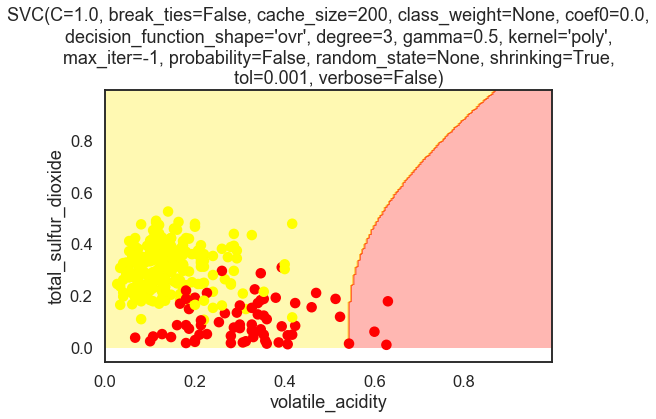

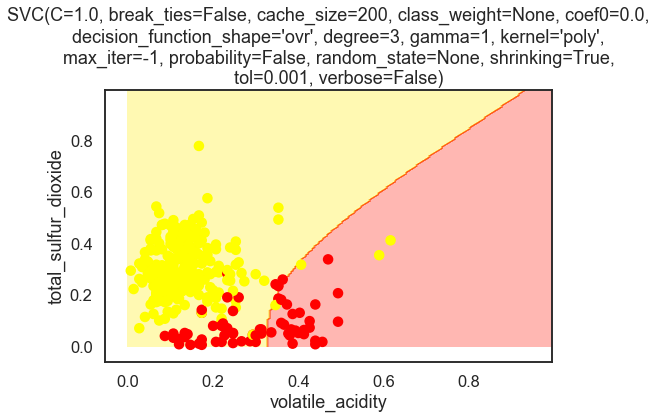

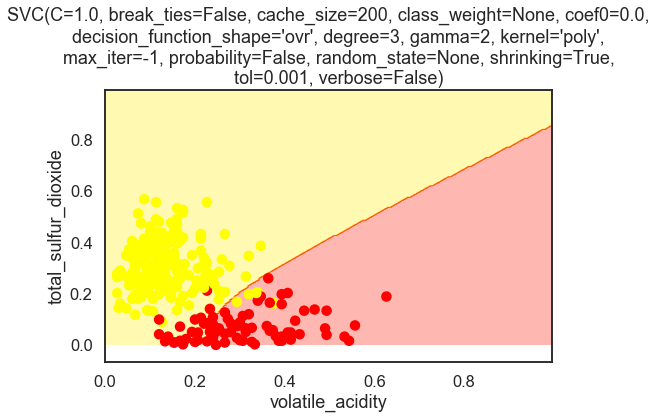

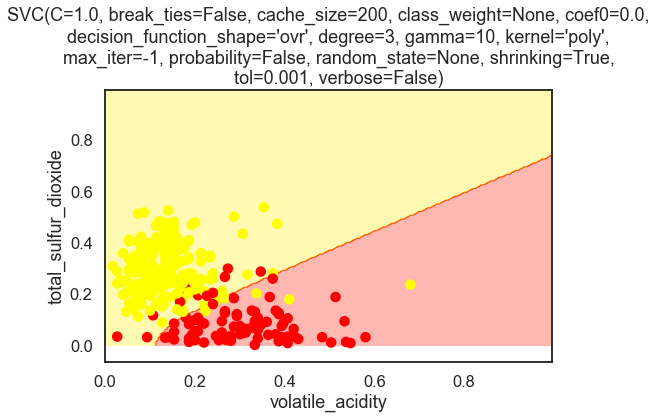

In [18]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Polynomial = SVC(kernel='poly', gamma=gamma)
    plot_decision_boundary(SVC_Polynomial, X, y)

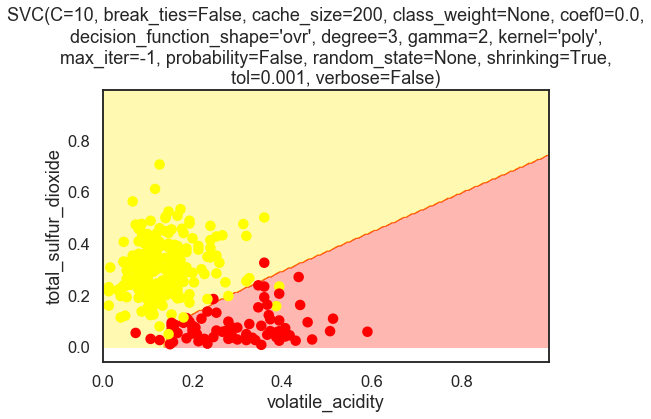

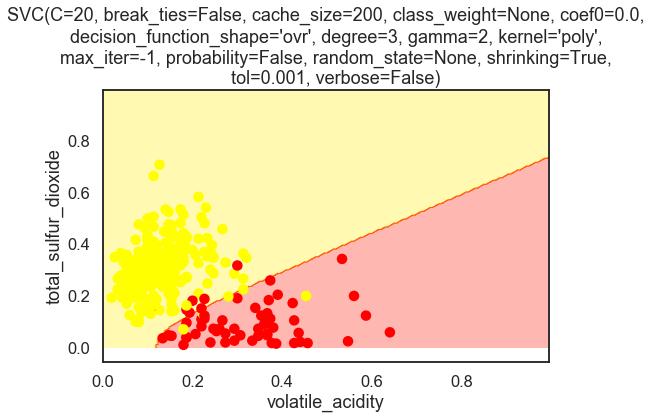

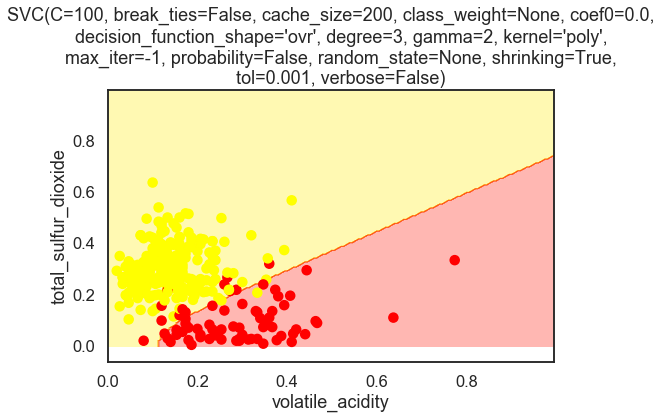

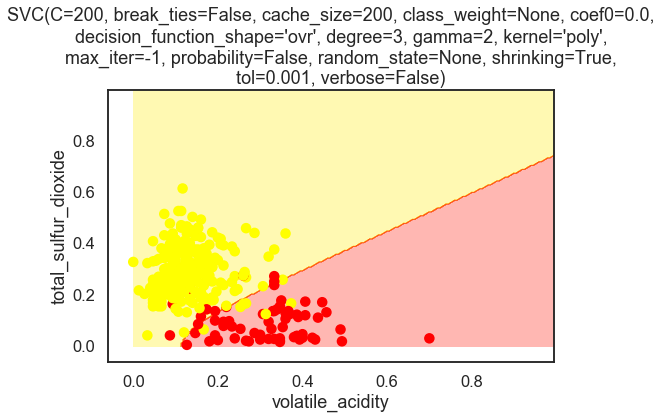

In [19]:
Cs = [10,20,100,200]
for C in Cs:
    SVC_Polynomial = SVC(kernel='poly', gamma=2, C=C)
    plot_decision_boundary(SVC_Polynomial, X, y)

In [20]:
param_grid = {'C': [10, 20, 100, 200],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.929, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=10, gamma=10, kernel=poly, score=0.936, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.936, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... C=10, gamma=10, kernel=poly, score=0.945, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.932, total=   0.1s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.921, total=   0.1s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.932, total=   0.1s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.931, total=   0.1s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.922, total=   0.1s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.922, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 20, 100, 200], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 200, 'gamma': 2, 'kernel': 'poly'}
SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [22]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1447
           1       0.94      0.77      0.85       503

    accuracy                           0.93      1950
   macro avg       0.93      0.88      0.90      1950
weighted avg       0.93      0.93      0.93      1950



## Sigmoid Kernel

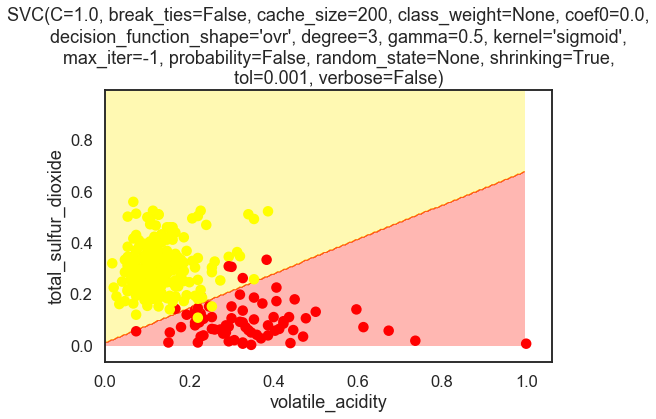

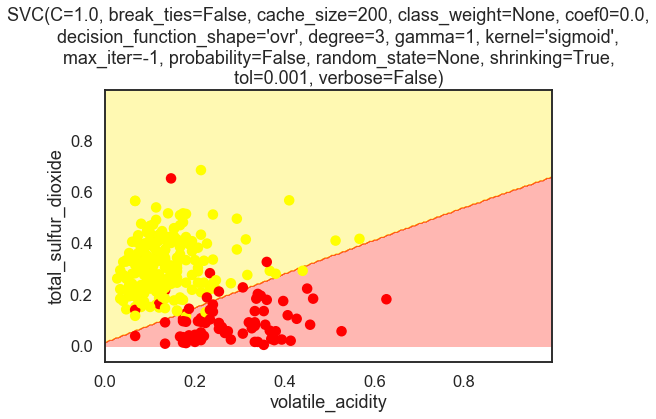

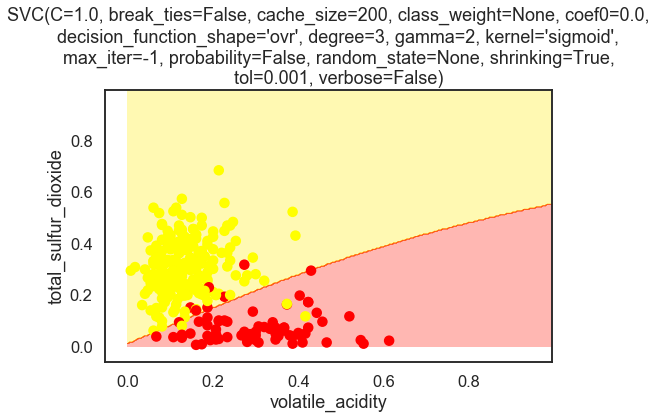

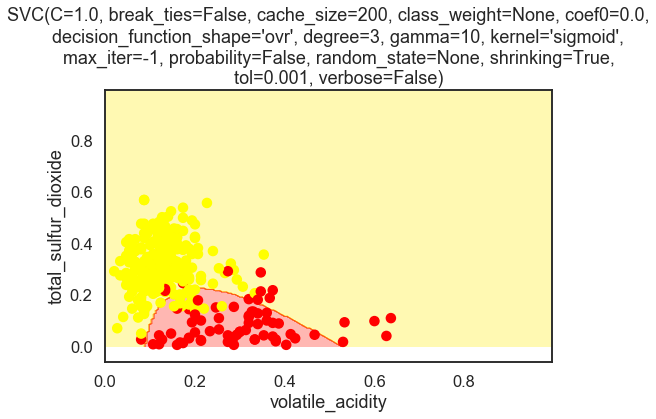

In [23]:
gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Sigmoid = SVC(kernel='sigmoid', gamma=gamma)
    plot_decision_boundary(SVC_Sigmoid, X, y)

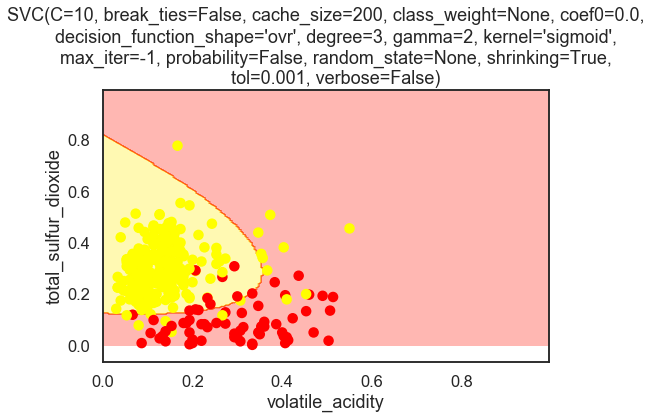

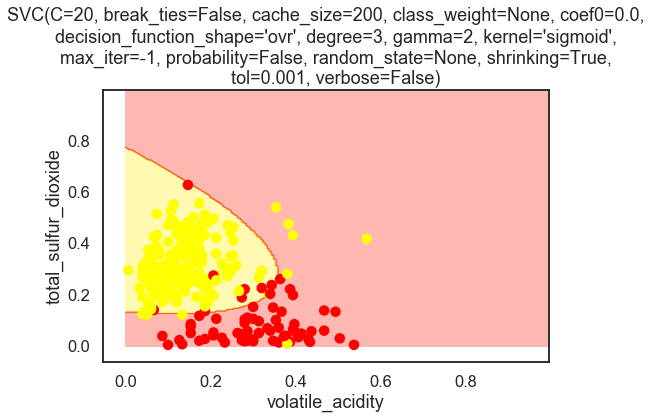

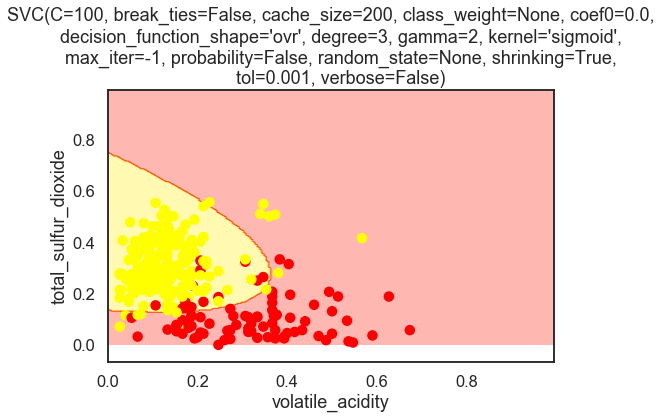

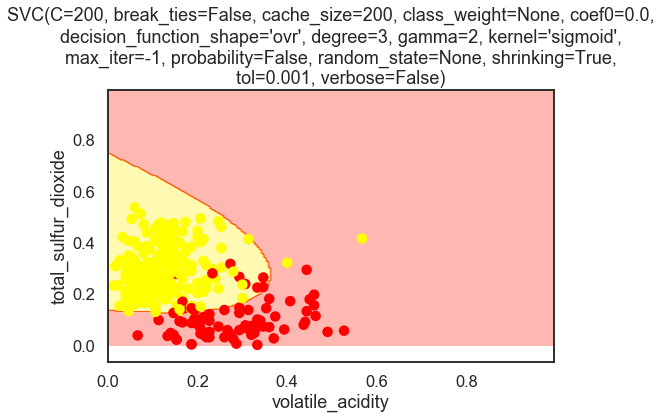

In [24]:
Cs = [10,20,100,200]
for C in Cs:
    SVC_Sigmoid = SVC(kernel='sigmoid', gamma=2, C=C)
    plot_decision_boundary(SVC_Sigmoid, X, y)

In [25]:
param_grid = {'C': [10, 20, 100, 200],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.897, total=   0.1s
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.887, total=   0.1s
[CV] C=10, gamma=10, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.870, total=   0.1s
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.892, total=   0.1s
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.910, total=   0.1s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.948, total=   0.1s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.946, total=   0.1s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.957, total=   0.1s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.938, total=   0.1s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 20, 100, 200], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 20, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [27]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1447
           1       0.93      0.90      0.91       503

    accuracy                           0.95      1950
   macro avg       0.95      0.94      0.94      1950
weighted avg       0.95      0.95      0.95      1950

